<a href="https://colab.research.google.com/github/1aidan2b2/Timelinethingy/blob/main/Unit3/Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

In unit 2, we asked "what's the true proportion of ____?"

In this unit's project, we'll ask "What's the true average of \_\_\_\_?" or "What's the true amount of \_\_\__?"

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.



2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one prior, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The chemshift data anlysis portion of the Unit3NotesAK is your example. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- A posterior predictive check is more important than the posterior for this project. Ask me if you want to know why.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.

amount of high rain days



In [1]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 10.4 MB/s eta 0:00:00


In [2]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd, we using polar bears bois
import arviz as az
import polars as pl
import pymc as pm

In [20]:
link = "https://github.com/1aidan2b2/data-science-fundamentals-Aidan/raw/refs/heads/main/Data/missriver1.csv"

dat = pl.read_csv(link)

datuse = dat["discharge"]
print(datuse)
datusenp = datuse.to_numpy()
with pm.Model() as Water:
  #we define our prior with the makes and misses from Euroleague
  θ = (pz.Poisson(mu=100)).to_pymc(name="nu")

  #The Bernoulli likelihood is a stand in for the binomial distribution
  y = pm.StudentT('y',nu= θ, observed = datusenp)
  #sample from our posterior
  idata_Water = pm.sample(2000,progressbar=False)

shape: (876,)
Series: 'discharge' [f64]
[
	63.69
	81.0
	125.42
	272.29
	427.68
	…
	82.75
	57.26
	36.0
	63.25
	47.78
]


/usr/local/lib/python3.12/dist-packages/pymc/step_methods/metropolis.py:321: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/usr/local/lib/python3.12/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


<Axes: title={'center': 'θ'}>

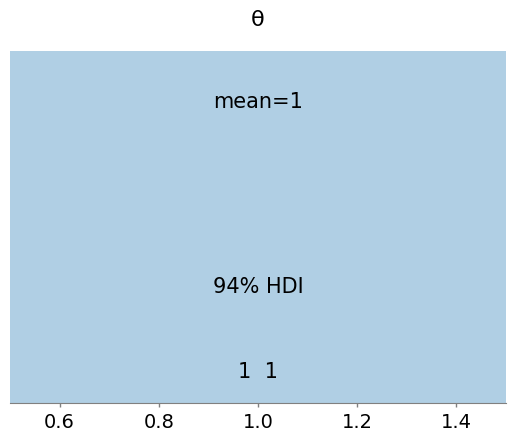

In [17]:
az.plot_posterior(idata_Water)